In [106]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [107]:
from matplotlib import font_manager, rc
import matplotlib

#한글 폰트 등록
font_location = "c:/Windows/fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

In [116]:
df = pd.read_csv('heart.csv')

In [117]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


![컬럼명세](https://user-images.githubusercontent.com/35517797/70862044-38f0d580-1f7a-11ea-9234-54bd8644794c.PNG)

In [118]:
# slope,ca의 경우 수치형이 아닌 범주형으로 다룰 필요

category = ['sex','cp','fbs','restecg','exang','thal','slope','ca']
numeric = ['age','trestbps','chol','thalach','oldpeak']

In [119]:
# describe

# 수치형 데이터에 대한 탐색
df[numeric].describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [120]:
# 심장병 유무별 데이터 탐색

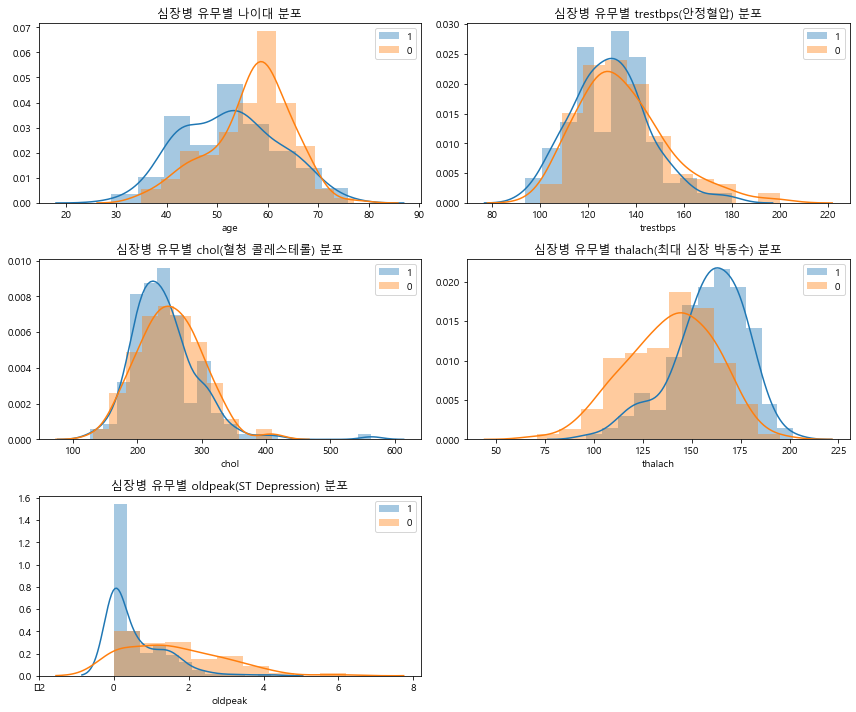

In [121]:
# numeric data visualization

plt.figure(figsize=(12,10))

ax1 = plt.subplot(321)

ax1 = sns.distplot(df[df.target == 1]['age'],label='1')
ax1 = sns.distplot(df[df.target == 0]['age'],label='0')

ax1.legend()
ax1.set_title('심장병 유무별 나이대 분포')


#######################################################

ax2 = plt.subplot(322)

ax2 = sns.distplot(df[df.target == 1]['trestbps'],label='1')
ax2 = sns.distplot(df[df.target == 0]['trestbps'],label='0')

ax2.legend()
ax2.set_title('심장병 유무별 trestbps(안정혈압) 분포')


#######################################################


ax3 = plt.subplot(323)

ax3 = sns.distplot(df[df.target == 1]['chol'],label='1')
ax3 = sns.distplot(df[df.target == 0]['chol'],label='0')

ax3.legend()
ax3.set_title('심장병 유무별 chol(혈청 콜레스테롤) 분포')


#######################################################


ax4 = plt.subplot(324)

sns.distplot(df[df.target == 1]['thalach'],label='1')
sns.distplot(df[df.target == 0]['thalach'],label='0')

ax4.legend()
ax4.set_title('심장병 유무별 thalach(최대 심장 박동수) 분포')


#######################################################


ax4 = plt.subplot(325)

sns.distplot(df[df.target == 1]['oldpeak'],label='1')
sns.distplot(df[df.target == 0]['oldpeak'],label='0')

ax4.legend()
ax4.set_title('심장병 유무별 oldpeak(ST Depression) 분포')

#######################################################

plt.tight_layout()
plt.show()

In [122]:
# categorical data visualization

## 시각화 함수 생성
plt_df = None
def bar_chart(feature):
    yes_heart = df[df.target == 1][feature].value_counts()
    no_heart = df[df.target == 0][feature].value_counts()  
    plt_df = pd.DataFrame([yes_heart,no_heart])
    plt_df.index = ['yes_heart','no_heart']
    plt_df.plot(kind='bar',stacked=True,figsize=(10,5))
    p
    return plt_df

,1,0
yes_heart,93,72
no_heart,114,24


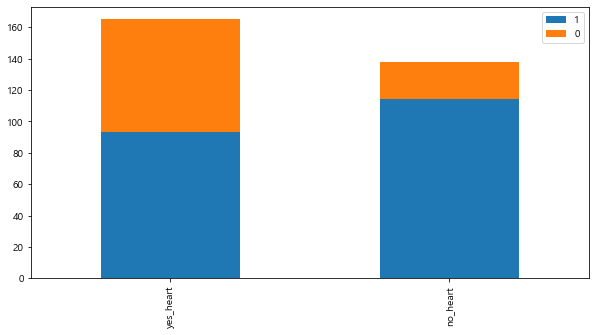

In [124]:
bar_chart('sex')